<a href="https://colab.research.google.com/github/MeldaChen/practice/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url =("https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/train.csv")
urlretrieve(url, "train.csv")
url = ("https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/test.csv")
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f2ad5cabf90>)

In [ ]:
# kaggle 的 test 裡的 Survived 是要預測的目標
import pandas as pd
datas = pd.read_csv("train.csv", encoding = "utf-8")
predicts = pd.read_csv("test.csv", encoding = "utf-8")

In [ ]:
predicts

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 先做資料整理,盡量不要刪欄位，但欄位裡面的值可以歸類，像是 Cabin、Name、Ticket
# pandas 兩表合併 concat, ignore_index = True 表示忽略列標籤
# 刪除用 drop  ( predicts的Survived 不知 )
# pandas 會做新表格，要取代回去
# axis=0 表示橫向， 1表示縱向

combine = pd.concat([datas, predicts], axis = 0, ignore_index = True)
combine = combine.drop(["PassengerId", "Survived"], axis = 1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


pandas axis 0 表示橫向， 1表示縱向
https://i.stack.imgur.com/4pFuZ.png

In [ ]:
# pandas apply 表示對某一欄做全部轉換
# isna 表示值為 NaN 者, (空的等於True，有值的視為False)

def change(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
combine["Cabin"] = combine["Cabin"].apply(change)

In [ ]:
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 老師試過人名的姓、票的前綴，對結果沒什麼幫助
# python split 分段，先以.分段，抓[0]的位置，出現Braund, Mr，再用, 分段，抓最後一個[-1]，出現 Mr 
# Mr 前後空白用 strip 剝除前後


n = "Braund, Mr. Owen Harris"
n.split(".")[0].split(',')[-1].strip()

'Mr'

In [ ]:
# 留下姓氏的 Mr. Mrs  Miss
def change(n):
  if pd.isna(n):
    return n
  else:
    return n.split(".")[0].split(',')[-1].strip()
combine["Name"] = combine["Name"].apply(change)

In [ ]:
# 找出每張票總共有多少人搭乘

count = combine["Ticket"].value_counts()

def change(t):
  if pd.isna(t):
    return t
  else:
    return count[t]
combine["Ticket"] = combine["Ticket"].apply(change)

In [ ]:
# pandas 的篩選操作
# DataFrame / Series [帶入跟你資料筆數一樣多的 True / False]

pd.DataFrame([
    [1, 2], 
    [3, 4], 
    [5, 6]])[[True, False, True]]

,0,1
0,1,2
2,5,6


In [ ]:
# 左邊的0 2 是list中的位置 [0] [2] 
pd.Series([1, 2, 3])[[True, False, True]]

0    1
2    3
dtype: int64

In [ ]:
# pandas 的篩選操作
# DataFrame / Series [帶入跟你資料筆數一樣多的 True / False]
# sort_values() 排序，預設值為升序ascending，降序要用 (ascending = False)


s = combine.isna().sum()  #看所有欄位是否有空值
s[s > 0].sort_values(ascending = False) #抓出s中有空值的欄位


Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
# 不能有空的值：補一個最有可能的值
# 類別值(固定數種)：Embarked, Pclass, Name(中間), Sex, Cabin  →缺失的可 補最多數 或 One-Hot Encoding
# 最常出現的值
# 數值(無限多種可能)：Age, SibSp, Parch, Ticket, Fare →缺失的補中位數
# 中間值(中位數)
# idxmax 為 index 中最多的，Embarked 有空兩格，查出 Embarked 最多值為S，故補S
# 
# Step1.補類別值  
#         (在訓練資料補的值最好可用csv記下來,測試資料有缺的也補訓練資料補的數值，一開始就combine兩個表，就一起補)

mostidx = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(mostidx)

In [ ]:
# 此時可看出 Embarked 已無空值
s = combine.isna().sum()  #看所有欄位是否有空值
s[s > 0].sort_values(ascending = False) #抓出有空值的欄位

Cabin    1014
Age       263
Fare        1
dtype: int64

In [ ]:
# 數值類補中位數 median() 
# 艙等非數值，但因為艙等是 123，median()也會計算，但應該要補的不是中位數，而是最多人坐的艙等(這題剛好也是3)
# 不要的就drop，其餘補上中位數


med = combine.median().drop("Pclass")
combine = combine.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
s = combine.isna().sum()  #看所有欄位是否有空值
s[s > 0].sort_values(ascending = False) #抓出s中有空值的欄位

Cabin    1014
dtype: int64

In [ ]:
# Step2. 對類別做One-Hot Encoding

# 做一定沒問題，但有沒有欄位可不做 One-Hot Encoding？
# Pclass：有大小關係的類別!!! 補最常出現  One-Hot Encoding 可做可不做，試過才知道：老師試過，做比較好
# Sex：可不做，因為是二值問題，male 設0，female 設1 ，但超過兩個就要做One-Hot Encoding 

In [ ]:
# 類別型態一定要做 One-Hot Encoding  (有時某些東西太稀少，為了美觀可去掉，如combine["Name"].value_counts()跑出的Lady~Dona 都只出現一次)
# 類別到底要補值還是 One-Hot Encoding？ 可以都試試看，先做OHE，再補值，除非你確定補得很準 
# Name 可以做 One-Hot Encoding

c = combine["Name"].value_counts()
whitelist = c[c > 50].index  #whitelist 只留下 Master Miss Mr Mrs
def change(n):
  if n in whitelist:
    return n
  else:
    return None
combine["Name"] = combine["Name"].apply(change)

In [ ]:
# pandas 做 One-Hot Encoding 可直接用 pd.get_dummies()
# pandas 顯示多個 column 用 pd.set_option("display.max_columns", 500) 最多顯示500個

pd.set_option("display.max_columns", 500)
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns = ["Pclass"])
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
combine["Family"] = combine["SibSp"] + combine["Parch"]
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 拿列 loc (用index,第一列算索引) / iloc (用實際的第幾筆，第一列不算索引)
# iloc: [row1, row2, row3]

d = pd.DataFrame([
    [1, 2],
    [3, 4]], index = [3,0])

d.iloc[0]


0    1
1    2
Name: 3, dtype: int64

In [ ]:
# 資料處理結束
# 分開，準備開始建立模型
# 所有資料都要轉 np.array

import numpy as np
x = combine.iloc[:len(datas)]
x = np.array(x)

y = datas["Survived"]
y = np.array(y)

x_predict = combine.iloc[len(datas):]
x_predict = np.array(x_predict)

In [ ]:
# 讓sklearn 寫迴圈 GridSearchCV
# search 沒有帶x, y ，故要再fit
# cv = 25 比 cv = 10 的分數高

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

params = {
    "max_depth":range(3, 15)
}

search = GridSearchCV(clf, params, cv = 25, n_jobs = -1)
search.fit(x, y)

GridSearchCV(cv=25, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15)})

In [ ]:
print(search.best_score_)
print(search.best_params_)

0.8340634920634921
{'max_depth': 4}


In [ ]:
# cross validation 交叉驗證  cv=10 做十次，  n_jobs 平行運算，n_jobs=-1 表示所有處理器同時進行運算
# max_depth 可以多試幾次，每次跑出來的分數不太一樣
# 此為原理，可以請sklearn 直接做迴圈找最好的參數，如以上兩格

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4)
scores = cross_val_score(clf, x, y, cv = 25, n_jobs = -1)
print("10 scores:", scores)
print("average:", np.average(scores))

10 scores: [0.77777778 0.86111111 0.88888889 0.80555556 0.94444444 0.77777778
 0.80555556 0.63888889 0.86111111 0.94444444 0.86111111 0.75
 0.88888889 0.83333333 0.77777778 0.77777778 0.91428571 0.82857143
 0.77142857 0.82857143 0.82857143 0.85714286 0.85714286 0.85714286
 0.91428571]
average: 0.8340634920634921


In [ ]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId": predicts["PassengerId"],
    "Survived": pre
})
result.to_csv("dt.csv", encoding = "utf-8", index = False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# RandomForestClassifier 隨機森林篩選器，在 sklearn.ensemble 裡
# n_estimators 表示有幾個小精靈造樹,(11, 150, 2) 表示從11-149，每兩個數字造一棵
# 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

params = {
    "max_depth":range(3, 10),
    "n_estimators":range(11, 150, 2)
}

search = GridSearchCV(clf, params, cv = 25, n_jobs = -1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.842857142857143
{'max_depth': 6, 'n_estimators': 67}


In [ ]:
# RandomForestClassifier 用 best_estimators_ 不用再fit

clf = search.best_estimator_
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId": predicts["PassengerId"],
    "Survived": pre
})
result.to_csv("rf.csv", encoding = "utf-8", index = False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 叫出所有的決策樹

clf.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=836397782),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=872748283),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1078885093),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=794699038),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1338342996),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1827933382),
 DecisionTreeClassifier(max_depth=6, max_features='auto',
                        random_state=1644769547),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=19348637),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=54992165),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=993590529),
 DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=3

[Text(0.5769230769230769, 0.875, 'Name_Mrs <= 0.5\ngini = 0.466\nsamples = 557\nvalue = [561, 330]\nclass = Dead'),
 Text(0.3076923076923077, 0.625, 'Fare <= 77.623\ngini = 0.434\nsamples = 485\nvalue = [535, 250]\nclass = Dead'),
 Text(0.15384615384615385, 0.375, 'Age <= 6.5\ngini = 0.4\nsamples = 443\nvalue = [516, 197]\nclass = Dead'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'Sex_male <= 0.5\ngini = 0.389\nsamples = 42\nvalue = [19, 53]\nclass = Survived'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'Embarked_Q <= 0.5\ngini = 0.37\nsamples = 72\nvalue = [26, 80]\nclass = Survived'),
 Text(0.7692307692307693, 0.375, 'Family <= 4.5\ngini = 0.347\nsamples = 70\nvalue = [23, 80]\nclass = Survived'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),

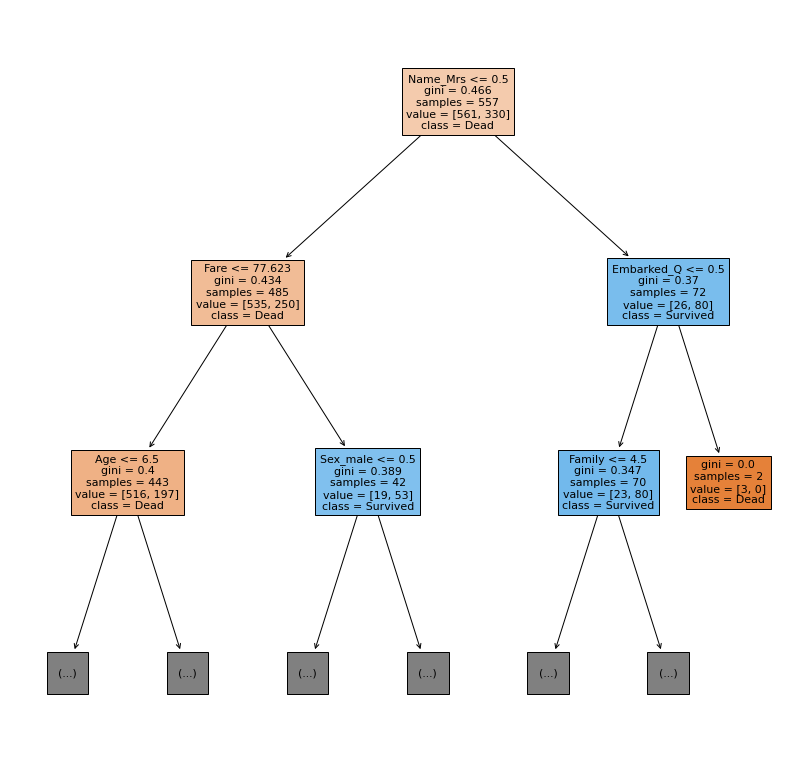

In [ ]:
# 如果你想知道 rf 的第0棵決策樹長相
# 決策樹有可解釋性 feature_importances_

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (14, 14))
plot_tree(clf.estimators_[0],
      feature_names = combine.columns,
      filled = True,
      max_depth = 2,
      class_names = ["Dead", "Survived"])

In [ ]:
# feature_importances_ 找出影響生存的重要因素 

imp = pd.DataFrame({
    "imp":clf.feature_importances_
    }, index = combine.columns)
imp.sort_values(by = "imp", ascending = False)

,imp
Sex_female,0.143582
Name_Mr,0.140244
Sex_male,0.140071
Fare,0.084466
Age,0.064309
Name_Mrs,0.055892
Pclass_3,0.055334
Ticket,0.054352
Family,0.049493
Pclass_1,0.041585


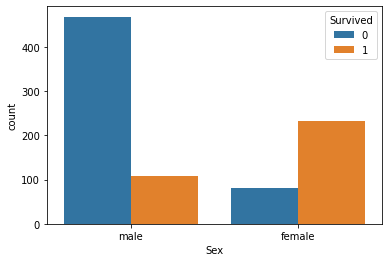

In [ ]:
# hue 表示多加上的，加上是否生存 (1 表示生存)

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = datas["Sex"], hue = datas["Survived"])

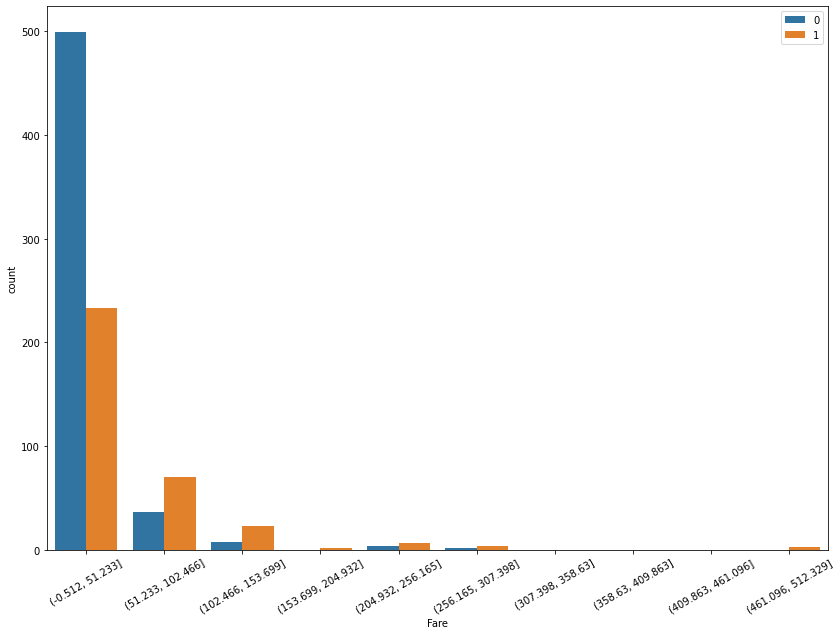

In [ ]:
# pandas cut 可以切段，以下表示 將 datas["Fare"]切為10段
# 因為觀察到的最低值不一定是事實最低值，pandas 會左右擴充 1%
# rotation 表示旋轉角度
plt.figure(figsize = (14, 10))
c = pd.cut(datas["Fare"], 10)
sns.countplot(x = c, hue = datas ["Survived"])
plt.xticks(rotation = 30)
plt.legend(loc="upper right")

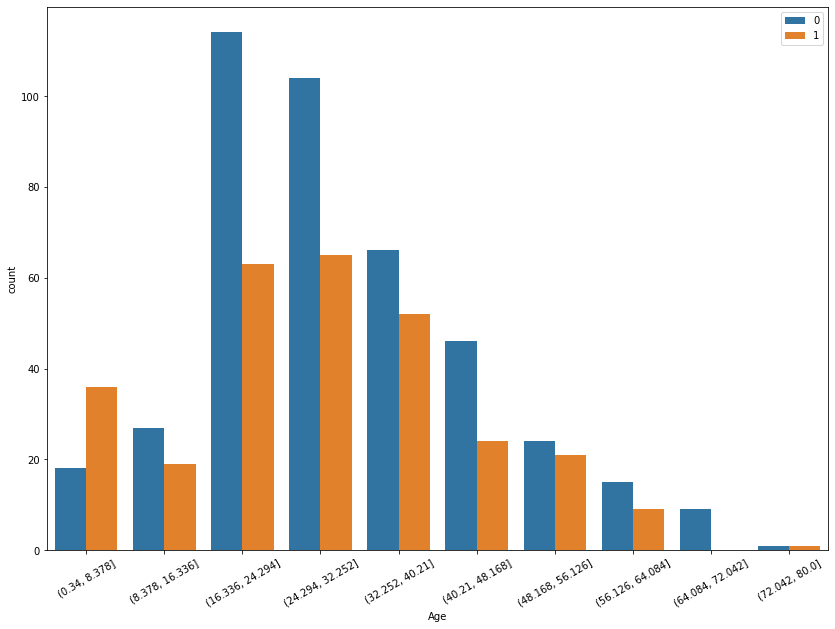

In [ ]:
plt.figure(figsize = (14, 10))
c = pd.cut(datas["Age"], 10)
sns.countplot(x = c, hue = datas ["Survived"])
plt.xticks(rotation = 30)
plt.legend(loc="upper right")

In [ ]:
# knn 演算法  k nearest neighbors，根據離相關的演算法都要用scaling，把值限縮在0-1之間
# combine_scale 是 arry 要轉回成 DataFrame
# 訓練資料要fit, transform, 測試資料只需要transform

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine)
combine_scale = pd.DataFrame(combine_scale)
combine_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# 可以把要一起改的地方按 alt 再反白，然後一起改
x_scale = combine.iloc[:len(datas)]
x_scale = np.array(x_scale)

y_scale = datas["Survived"]
y_scale = np.array(y_scale)

x_predict_scale = combine.iloc[len(datas):]
x_predict_scale = np.array(x_predict_scale)

In [ ]:
# n_neighbors 表示問幾個鄰居

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 100)
}
search = GridSearchCV(clf, params, cv=25, n_jobs = -1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

0.8329523809523809
{'n_neighbors': 7}


In [ ]:
# 平常是用7，現在測試運氣,所以不用 best_estimator_，就要fit xy 

clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId": predicts["PassengerId"],
    "Survived": pre
})
result.to_csv("knn.csv", encoding = "utf-8", index = False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
